In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

测试数据的得分为： 0.7105263157894737
准确率为： 0.7105263157894737


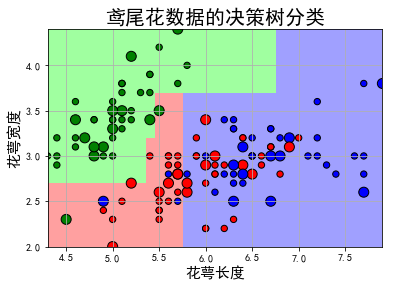

In [30]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

path = '8.iris.data'
df = pd.read_csv(path,header=0)
x = df.values[:,:-1]
y = df.values[:,-1]
x = x[:,:2]
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])
y = le.transform(y)
y = np.array(y)
#ss = StandardScaler()
#ss = ss.fit(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc.fit(x_train,y_train)
y_test_hat = dtc.predict(x_test)

f = open('.\\iris_tree.dot','w')
tree.export_graphviz(dtc,out_file=f)
f.close()

N,M = 200,200
x1_min ,x1_max = x[:,0].min() ,x[:,0].max()
x2_min ,x2_max = x[:,1].min() ,x[:,1].max()
t1 = np.linspace(x1_min,x1_max,N)
t2 = np.linspace(x2_min,x2_max,M)
x1,x2 = np.meshgrid(t1,t2)
x_show = np.stack((x1.flat,x2.flat),axis=1)
y_show = dtc.predict(x_show).reshape(x1.shape)

print('测试数据的得分为：',dtc.score(x_test,y_test))
i = (y_test_hat == y_test)
acc = np.mean(i)
print('准确率为：',acc)


cm_light = mpl.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g','r','b'])
plt.figure(facecolor='w')
plt.pcolormesh(x1,x2,y_show,cmap=cm_light)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train.ravel(),s=40,cmap=cm_dark,edgecolors='k')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test.ravel(),s=100,cmap=cm_dark,edgecolors='k',marker='o')
plt.xlabel('花萼长度',fontsize=15)
plt.ylabel('花萼宽度',fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('鸢尾花数据的决策树分类',fontsize=20)
plt.grid()
plt.show()

深度为1的决策树的准确率为： 0.5526315789473685
深度为2的决策树的准确率为： 0.5789473684210527
深度为3的决策树的准确率为： 0.7105263157894737
深度为4的决策树的准确率为： 0.7105263157894737
深度为5的决策树的准确率为： 0.6578947368421053
深度为6的决策树的准确率为： 0.6578947368421053
深度为7的决策树的准确率为： 0.5789473684210527
深度为8的决策树的准确率为： 0.5789473684210527
深度为9的决策树的准确率为： 0.5263157894736842
深度为10的决策树的准确率为： 0.5263157894736842
深度为11的决策树的准确率为： 0.631578947368421
深度为12的决策树的准确率为： 0.5789473684210527
深度为13的决策树的准确率为： 0.5526315789473685
深度为14的决策树的准确率为： 0.5263157894736842


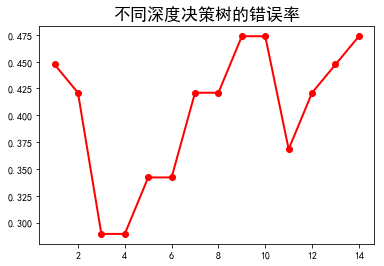

In [31]:
# 过拟合的错误率：

depth = range(1,15)
err_list = []
for d in depth:
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth=d)
    dtc.fit(x_train,y_train)
    y_test_hat = dtc.predict(x_test)
    i = (y_test_hat == y_test)
    acc = np.mean(i)
    print('深度为%d的决策树的准确率为：'%d,acc)
    err_list.append(1-acc)

plt.plot(depth,err_list,'ro-',lw=2)
plt.title('不同深度决策树的错误率',fontsize=17)
plt.show()

选取第0和第1特征的准确率为： 0.6052631578947368
选取第0和第2特征的准确率为： 0.9736842105263158
选取第0和第3特征的准确率为： 0.9736842105263158
选取第1和第2特征的准确率为： 0.9473684210526315
选取第1和第3特征的准确率为： 0.9736842105263158
选取第2和第3特征的准确率为： 0.9736842105263158


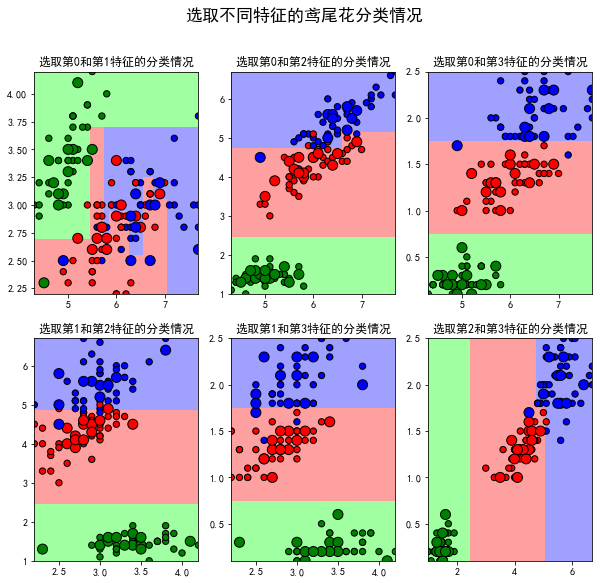

In [39]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

path = '8.iris.data'
df = pd.read_csv(path,header=0)
x_0 = df.values[:,:-1]
y = df.values[:,-1]
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])
y = le.transform(y)
y = np.array(y)

feature_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
x_train,x_test,y_train,y_test = train_test_split(x_0,y,random_state=1)

plt.figure(figsize=(10,9))
for i,pair in enumerate(feature_pairs):
    x = x_train[:,pair]
    dtc = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=3)
    dtc.fit(x,y_train)
    y_test_hat = dtc.predict(x_test[:,pair])
    
    N,M = 200,200
    x1_min ,x1_max = x[:,0].min(),x[:,0].max()
    x2_min ,x2_max = x[:,1].min(),x[:,1].max()
    t1 = np.linspace(x1_min,x1_max,N)
    t2 = np.linspace(x2_min,x2_max,M)
    x1,x2 = np.meshgrid(t1,t2)
    x_show = np.stack((x1.flat,x2.flat),axis=1)
    y_show = dtc.predict(x_show).reshape(x1.shape)
    
    result = (y_test_hat == y_test)
    acc = np.mean(result)
    print('选取第%d和第%d特征的准确率为：'%(pair[0],pair[1]),acc)
    
    cm_light = mpl.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g','r','b'])
    plt.subplot(2,3,i+1)
    plt.pcolormesh(x1,x2,y_show,cmap=cm_light)
    plt.scatter(x[:,0],x[:,1],c=y_train.ravel(),s=40,cmap=cm_dark,edgecolors='k')
    plt.scatter(x_test[:,pair[0]],x_test[:,pair[1]],c=y_test.ravel(),s=100,cmap=cm_dark,edgecolors='k',marker='o')
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    plt.title('选取第%d和第%d特征的分类情况'%(pair[0],pair[1]))
    
plt.suptitle('选取不同特征的鸢尾花分类情况',fontsize=17)
plt.show()
    

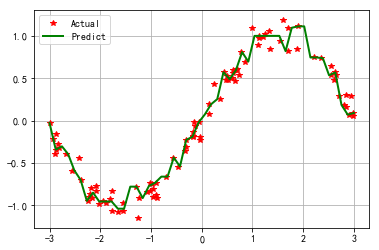

In [74]:
from sklearn.tree import DecisionTreeRegressor
x = np.random.rand(100)*6 - 3
x.sort()
y = np.sin(x) + np.random.randn(100)*0.1
x = x.reshape(-1,1)

reg = DecisionTreeRegressor(criterion='mse',max_depth=9)
reg.fit(x,y)
x_test = np.linspace(-3,3,50).reshape(-1,1)
y_hat = reg.predict(x_test)
#x_test = x_test.reshape(1,-1)
plt.plot(x,y,'r*',label='Actual')
plt.plot(x_test,y_hat,'g-',lw=2,label='Predict')
plt.legend(loc='upper left')
plt.grid()
plt.show()



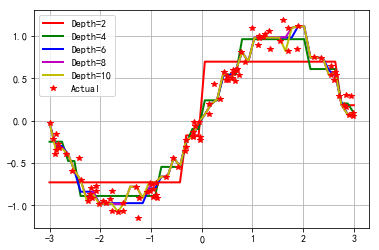

In [75]:
depth = [2,4,6,8,10]
col = 'rgbmy'
for i,d in enumerate(depth):
    reg = DecisionTreeRegressor(criterion='mse',max_depth=d)
    reg.fit(x,y)
    x_test = np.linspace(-3,3,50).reshape(-1,1)
    y_hat = reg.predict(x_test)
    plt.plot(x_test,y_hat,'-',color=col[i],lw=2,label=('Depth=%d'%d))

plt.plot(x,y,'r*',label='Actual')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [12]:
x = np.random.rand(20)*8-4
x.sort()
#y1 = np.sin(x) +3  + np.random.randn(200)*0.1
#y2 = np.cos(0.3*x) + np.random.randn(200)*0.01

y1 = np.sin(x) + np.random.randn(20) * 0.05
y2 = np.cos(x) + np.random.randn(20) * 0.05
y = np.vstack((y1,y2)).T
print(y)
x = x.reshape(-1,1)

#reg = DecisionTreeRegressor(criterion='mse',max_depth=10)
#reg.fit(x,y)

#x_test = np.linspace(-4,4,1000).reshape(-1,1)
#y_hat = reg.predict(x_test)
#plt.scatter(y_hat[:,0],y_hat[:,1],c='g',marker='s',s=100,label='Predict,Depth=10')
#plt.scatter(y[:,0],y[:,1],c='r',s=40,label='Actual')
#plt.legend(loc='upper left')
#plt.xlabel('y1')
#plt.ylabel('y2')
#plt.grid()
#plt.show()

[[ 0.73709478 -0.77600133]
 [ 0.16109891 -0.99423256]
 [-0.14523001 -1.07324556]
 [-0.40102165 -0.97724999]
 [-0.77697929 -0.67728214]
 [-0.9138258  -0.3843081 ]
 [-0.89143026 -0.22407589]
 [-0.63174645  0.71492724]
 [-0.52862252  0.97636184]
 [-0.03462018  1.04628308]
 [ 0.09187516  0.98762928]
 [ 0.32298366  0.97704626]
 [ 0.61318805  0.70803686]
 [ 0.79345313  0.65474446]
 [ 0.81017697  0.6695615 ]
 [ 0.99459259  0.20764076]
 [ 0.89614501  0.15566241]
 [ 0.93369219  0.05245733]
 [ 0.91040128 -0.46310735]
 [-0.74108113 -0.72249633]]


选取第0和第1个特征的随机森林分类的得分为： 0.8389261744966443
选取第0和第2个特征的随机森林分类的得分为： 0.959731543624161
选取第0和第3个特征的随机森林分类的得分为： 0.9731543624161074
选取第1和第2个特征的随机森林分类的得分为： 0.9530201342281879
选取第1和第3个特征的随机森林分类的得分为： 0.9664429530201343
选取第2和第3个特征的随机森林分类的得分为： 0.9731543624161074


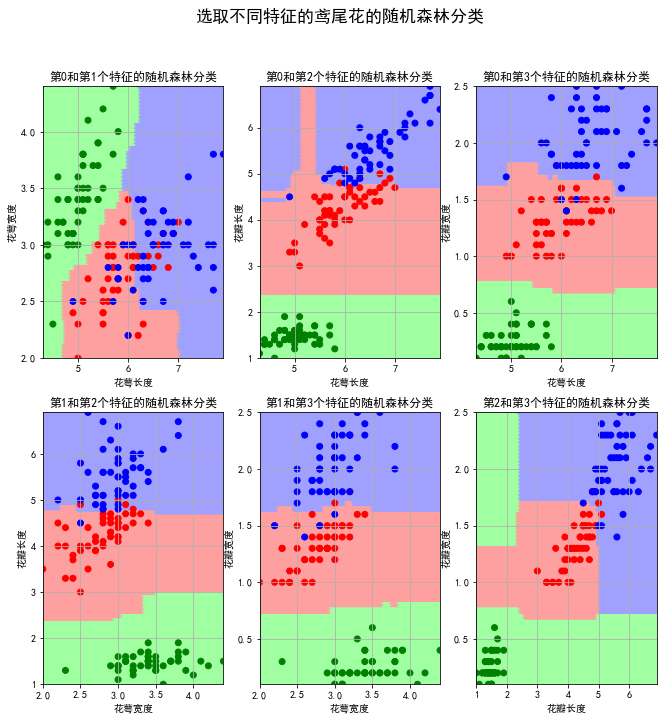

In [18]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

path = '8.iris.data'
df = pd.read_csv(path,header=0)
x_0 = df.values[:,:-1]
y = df.values[:,-1]
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])
y = le.transform(y)
y = np.array(y)
iris_features = ['花萼长度','花萼宽度','花瓣长度','花瓣宽度']
feature_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
plt.figure(figsize=(11,11))

for i,pair in enumerate(feature_pairs):
    x = x_0[:,pair]
    cla = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=4)
    cla.fit(x,y)
    
    N,M = 200,200
    x1_min ,x1_max = x[:,0].min() ,x[:,0].max()
    x2_min ,x2_max = x[:,1].min() ,x[:,1].max()
    t1 = np.linspace(x1_min,x1_max,N)
    t2 = np.linspace(x2_min,x2_max,M)
    x1,x2 = np.meshgrid(t1,t2)
    x_show = np.stack((x1.flat,x2.flat),axis=1)
    y_show = cla.predict(x_show).reshape(x1.shape)
    
    print('选取第%d和第%d个特征的随机森林分类的得分为：'%(pair[0],pair[1]),cla.score(x,y))
    cm_light = mpl.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g','r','b'])
    plt.subplot(2,3,i+1)
    plt.scatter(x1,x2,c=y_show,cmap=cm_light)
    plt.scatter(x[:,0],x[:,1],c=y,cmap=cm_dark)
    plt.grid()
    plt.xlabel(iris_features[pair[0]])
    plt.ylabel(iris_features[pair[1]])
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    plt.title('第%d和第%d个特征的随机森林分类'%(pair[0],pair[1]))
    
plt.suptitle('选取不同特征的鸢尾花的随机森林分类',fontsize=17)
plt.show()
